In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator


data_folder = '/content/drive/MyDrive/My Data Set(Cleaned)/Train'

image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)


training_set = image_generator.flow_from_directory(
    batch_size=256,
    directory=data_folder,
    shuffle=True,
    target_size=(48, 48),
    class_mode='categorical',
    subset='training'
)

testing_set = image_generator.flow_from_directory(
    batch_size=128,
    directory=data_folder,
    shuffle=True,
    target_size=(48, 48),
    class_mode='categorical',
    subset='validation'
)


Found 1354 images belonging to 7 classes.
Found 335 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
dim = (48,48)
n_sequence = 8
n_channels = 3 # color channel(RGB)
n_output = 7

In [ ]:
from keras.models import Sequential
from keras.layers import Reshape, TimeDistributed, GlobalAveragePooling2D, LSTM, Dense, Dropout
from keras.applications import MobileNetV2



model = Sequential()
model.add(Reshape((1, 48, 48, 3), input_shape=(48, 48, 3)))
model.add(TimeDistributed(
    MobileNetV2(weights='imagenet', include_top=False),
    input_shape=(n_sequence, *dim, n_channels)
))
model.add(TimeDistributed(GlobalAveragePooling2D()))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_output, activation='softmax'))


In [ ]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy" , metrics=['accuracy'])
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 50)

<ipython-input-12-32fd5ae0bc48>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 50)


Epoch 1/50
6/6 [==============================] - 96s 11s/step - loss: 2.0016 - accuracy: 0.1256 - val_loss: 1.9431 - val_accuracy: 0.2299
Epoch 2/50
6/6 [==============================] - 28s 5s/step - loss: 1.9420 - accuracy: 0.2061 - val_loss: 1.9319 - val_accuracy: 0.2388
Epoch 3/50
6/6 [==============================] - 23s 4s/step - loss: 1.9160 - accuracy: 0.2703 - val_loss: 1.9099 - val_accuracy: 0.2716
Epoch 4/50
6/6 [==============================] - 24s 5s/step - loss: 1.8724 - accuracy: 0.2895 - val_loss: 1.8765 - val_accuracy: 0.2925
Epoch 5/50
6/6 [==============================] - 25s 4s/step - loss: 1.8467 - accuracy: 0.3102 - val_loss: 1.8345 - val_accuracy: 0.3373
Epoch 6/50
6/6 [==============================] - 26s 4s/step - loss: 1.7905 - accuracy: 0.3545 - val_loss: 1.7781 - val_accuracy: 0.3403
Epoch 7/50
6/6 [==============================] - 25s 4s/step - loss: 1.7187 - accuracy: 0.3796 - val_loss: 1.7356 - val_accuracy: 0.3313
Epoch 8/50
6/6 [=================

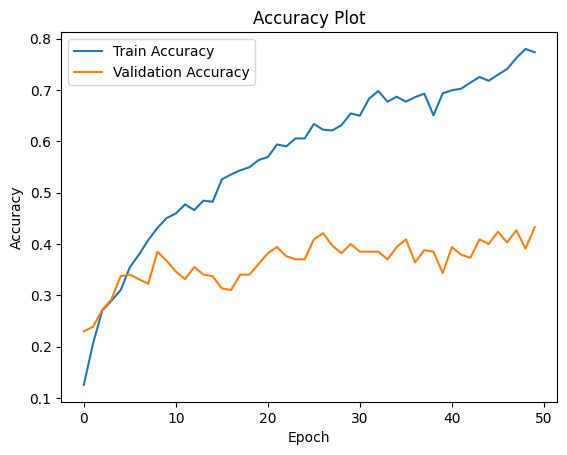

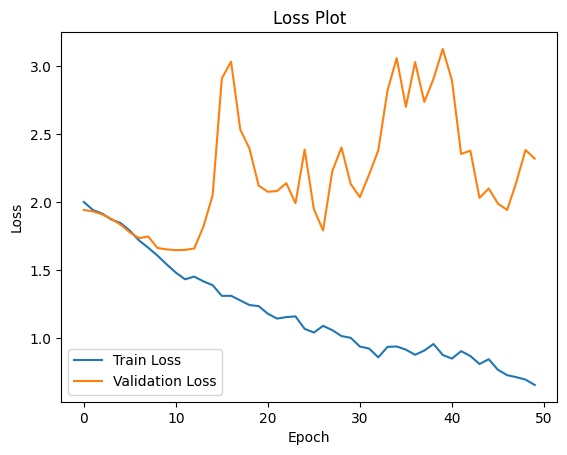

In [ ]:


plt.plot(hist.history["accuracy"], label='Train Accuracy')
plt.plot(hist.history["val_accuracy"], label='Validation Accuracy')
plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# Plot the loss
plt.plot(hist.history["loss"], label='Train Loss')
plt.plot(hist.history["val_loss"], label='Validation Loss')
plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("mobilenetCuDNNLSTMv3_loss.png")
plt.show()


In [ ]:
model.save("on mobile net.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix


y_pred_prob = model.predict_generator(testing_set)
y_pred = np.argmax(y_pred_prob, axis=1)


y_true = testing_set.classes


cm = confusion_matrix(y_true, y_pred)
print(cm)


<ipython-input-26-c8df28a396c5>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob = model.predict_generator(testing_set)


[[ 0  0  0  0  2  0  1]
 [ 0  0  0  1  1  0  0]
 [ 0  0  3 14  7  2 12]
 [ 0  0  6 30 23  1 17]
 [ 0  0  9 34 20  2 25]
 [ 0  0  2  9  7  0  7]
 [ 0  0  4 48 24  2 22]]


<ipython-input-24-25957fe86215>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob = model.predict_generator(testing_set)


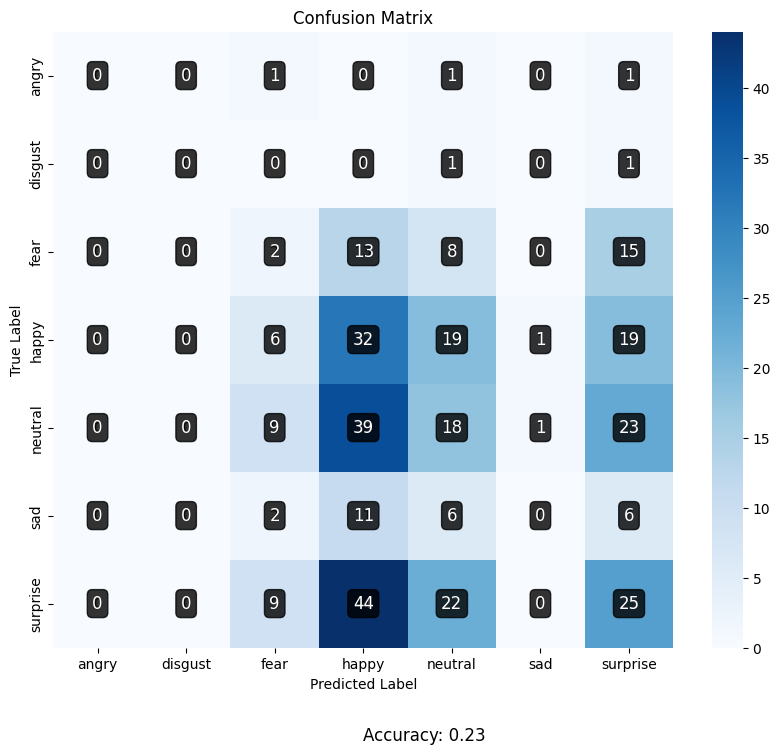

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the testing data
y_pred_prob = model.predict_generator(testing_set)
y_pred = np.argmax(y_pred_prob, axis=1)


y_true = testing_set.classes


cm = confusion_matrix(y_true, y_pred)


class_labels = list(testing_set.class_indices.keys())


accuracy = accuracy_score(y_true, y_pred)


def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')


    plt.text(0.5, -0.15, f'Accuracy: {accuracy:.2f}', transform=plt.gca().transAxes, fontsize=12)

    for i in range(len(classes)):
        for j in range(len(classes)):
            text = str(cm[i, j])
            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='white', fontsize=12,
                     bbox=dict(facecolor='black', alpha=0.8, boxstyle='round,pad=0.3'))

    plt.show()


plot_confusion_matrix(cm, class_labels)

